<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/clustering/DBSCAN/DBSCAN_MallCustomers_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Load & Inspect Data

In [ ]:
path = '/content/drive/MyDrive/Tek works/ML Data Source/Mall_Customers.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Analyze Features

In [ ]:
X = df.iloc[:, [3, 4]].values

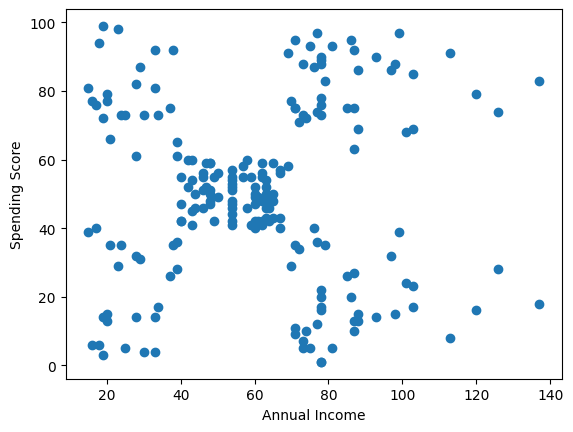

In [ ]:
# plot X
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Scale Features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Build Model

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

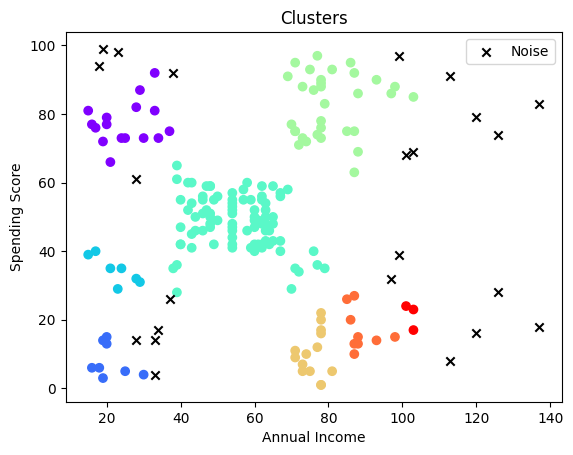

In [ ]:
# Plot clusters
mask_noise = clusters == -1
mask_clusters = clusters != -1

plt.scatter(x=X[mask_clusters, 0], y=X[mask_clusters, 1], c=clusters[mask_clusters], cmap='rainbow')
plt.scatter(x=X[mask_noise, 0], y=X[mask_noise, 1], c='black', label='Noise', marker='x')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.legend()
plt.show()

## Evaluate Model

In [ ]:
# silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, clusters)
print(score)

0.38427960728258165


## Experiment with various Epsilon values

In [ ]:
eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

In [ ]:
def model_data(eps, min_samples=4):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  clusters = dbscan.fit_predict(X_scaled)

  no_of_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
  no_of_noise = list(clusters).count(-1)
  noise_percentage = round(no_of_noise / len(clusters) * 100, 2)
  score = silhouette_score(X_scaled, clusters)

  print('Epsilon:', eps)
  print('Number of clusters:', no_of_clusters)
  print('Number of noise:', no_of_noise)
  print('Noise percentage:', noise_percentage)
  print('Silhouette score:', round(score, 3))
  print()

In [ ]:
for i in eps:
  model_data(i)

Epsilon: 0.1
Number of clusters: 7
Number of noise: 151
Noise percentage: 75.5
Silhouette score: -0.276

Epsilon: 0.2
Number of clusters: 5
Number of noise: 73
Noise percentage: 36.5
Silhouette score: 0.197

Epsilon: 0.3
Number of clusters: 8
Number of noise: 23
Noise percentage: 11.5
Silhouette score: 0.384

Epsilon: 0.4
Number of clusters: 3
Number of noise: 14
Noise percentage: 7.0
Silhouette score: 0.398

Epsilon: 0.5
Number of clusters: 2
Number of noise: 8
Noise percentage: 4.0
Silhouette score: 0.35

Epsilon: 0.6
Number of clusters: 1
Number of noise: 5
Noise percentage: 2.5
Silhouette score: 0.421

